In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import glob
import seaborn as sns

In [2]:
USE_LATEX=False
FIGURE_DIR = 'plot'
FIGURE_DIR1 = 'BOX'
FIGURE_DIR2 = 'BAR'

In [3]:
def load_stats_dataframe(files, aggregated_results=None):
    # print(os.path.exists(aggregated_results))
    # print(os.path.getmtime(aggregated_results)) # 文件的创建时间
    # aggregated 是压缩文件，由该函数最后生成
    if os.path.exists(aggregated_results):
        return pd.read_pickle(aggregated_results)

    df = pd.DataFrame()

    for f in files:
        tmp_dict = pd.read_pickle(f)

        tmp_dict['iteration'] = f.split('_')[-2]

        del tmp_dict['result']

        tmp_df = pd.DataFrame.from_dict(tmp_dict)
        # print(len(tmp_df))
        df = pd.concat([df, tmp_df])

    if aggregated_results:
        # to_pickle：文件压缩
        df.to_pickle(aggregated_results)

    return df

def figsize_text(scale, height_ratio=1.0):
    fig_width_pt = 504  # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27  # Convert pt to inch
    golden_mean = (np.sqrt(5.0) - 1.0) / 2.0  # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = fig_width * golden_mean * height_ratio  # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size


# reward_names = {
#
# "aphf_all_reward":"aphf",
# "aphf_all_novlty_noth_reward_timefactor":"aphf_time",
# "aphf_all_novlty_noth_reward_mm_timefactor":"aphf__mm_time",
# "aphf_all_novlty_noth_reward_mm":"aphf_mm",
# "aphf_all_novlty_noth_reward":"aphf_noth",
#
# }

reward_names =  {
        "tcfail":"tcfail",
        "ATCF_NLF":"add_tcfail_1",
       
    }
# dict type
env_names = {
                'iofrol': 'ABB IOF/ROL',
                "paintcontrol":"PaintControl",
                "apache_drill": 'Apache Drill',
                "google_auto": "Google Auto",
                "dspace": "Dspace",
                "apache_parquet": "Apache Parquet",
                'apache_commons': 'Apache Commons',
                'apache_tajo':'Apache Tajo',
                'google_closure':'Google Closure',
                'google_guava':'Google Guava',
                'mybatis':'Mybatis',
                'rails':'Rails'
}

env_list=['apache_commons',"apache_drill","apache_parquet",'apache_tajo',"dspace",
"google_auto",'google_closure','google_guava','iofrol','mybatis',"paintcontrol",'rails']

    
def visualize():

    df =pd.read_pickle("RQ2_rq")
    pure_df = df[ (df['detected'] + df['missed']) > 0]
    mean_df = pure_df.groupby(['env', 'rewardfun','step'], as_index=False).mean()



    fig, axarr = plt.subplots(6, 2, sharey=True, sharex=False, figsize=(24, 36), dpi=200)
    plotname = 'rq2_napfd'
    subplot_labels = ['(1)', '(2)', "(3)", "(4)", "(5)",'(6)', '(7)', "(8)", "(9)", "(10)" ,"(11)", "(12)"]

    
    for column, env in enumerate(env_list):
        #print("column=",column)
        x=column//2 # 行
        y=column%2  # 列
        #print("(x,y)=",x,y,type(x),type(y))
        axarr[x, y].set_title(env_names.get(env))
        
        for row, (labeltext, rewardfun, linestyle) in enumerate(
            [('TCF', 'tcfail', '-'),('ATCF1', 'add_tcfail_1', '--')]): # 
           
            rel_df = mean_df[(mean_df['env'] == env) & (mean_df['rewardfun'] == rewardfun)]
            rel_df.plot(x='step', y='napfd', label=labeltext, ylim=[0, 1], linewidth=1.5,
                                                    style=linestyle, color=sns.color_palette()[row],
                                                    ax=axarr[x, y])


            # xx = []
            # yy = rel_df['napfd']
            # for i in range(len(yy)):
            #     xx.append(i)
            # #print(len(xx),len(yy))

            # ndf=pd.DataFrame({"xx":xx,"yy":yy})
            # ndf.plot(x='xx', y='yy', label=labeltext, ylim=[0, 1], linewidth=1.5,
            #                                         style=linestyle, color=sns.color_palette()[row],
            #                                         ax=axarr[x, y])
            
            #trend = np.poly1d(np.polyfit(xx, yy, 1))
            #axarr[x, y].plot(yy, color=sns.color_palette()[row], linewidth=0.8)
            #axarr[x, y].plot(xx,trend(xx), color='k', linewidth=0.8)
            

            # axarr[x, y].legend_.remove()
            # print(env,len(x),type(x),x)
            #if row==1:
            #print(len(xx))
            #axarr[x,y].set_xlim(0,len(xx))
            
            # axarr[x, y].set_xticks(np.arange(0, len(xx), 30), minor=False)
            # axarr[row, column].set_xticklabels([0, '', 60, '', 120, '', 180, '', 240, '', 300, ''], minor=False)
            axarr[x, y].xaxis.grid(True, which='major')
            axarr[x, y].yaxis.grid(True, which='major')


        if y == 0:
            axarr[x, y].set_ylabel('NAPFD')
       
        axarr[x, y].set_xlabel('CI Cycle')

        
    # fig.tight_layout()
    fig.subplots_adjust(wspace=0.06, hspace=0.4)
    fig.savefig(os.path.join(FIGURE_DIR, plotname + '.png'), bbox_inches='tight')
    plt.show()
    plt.clf()


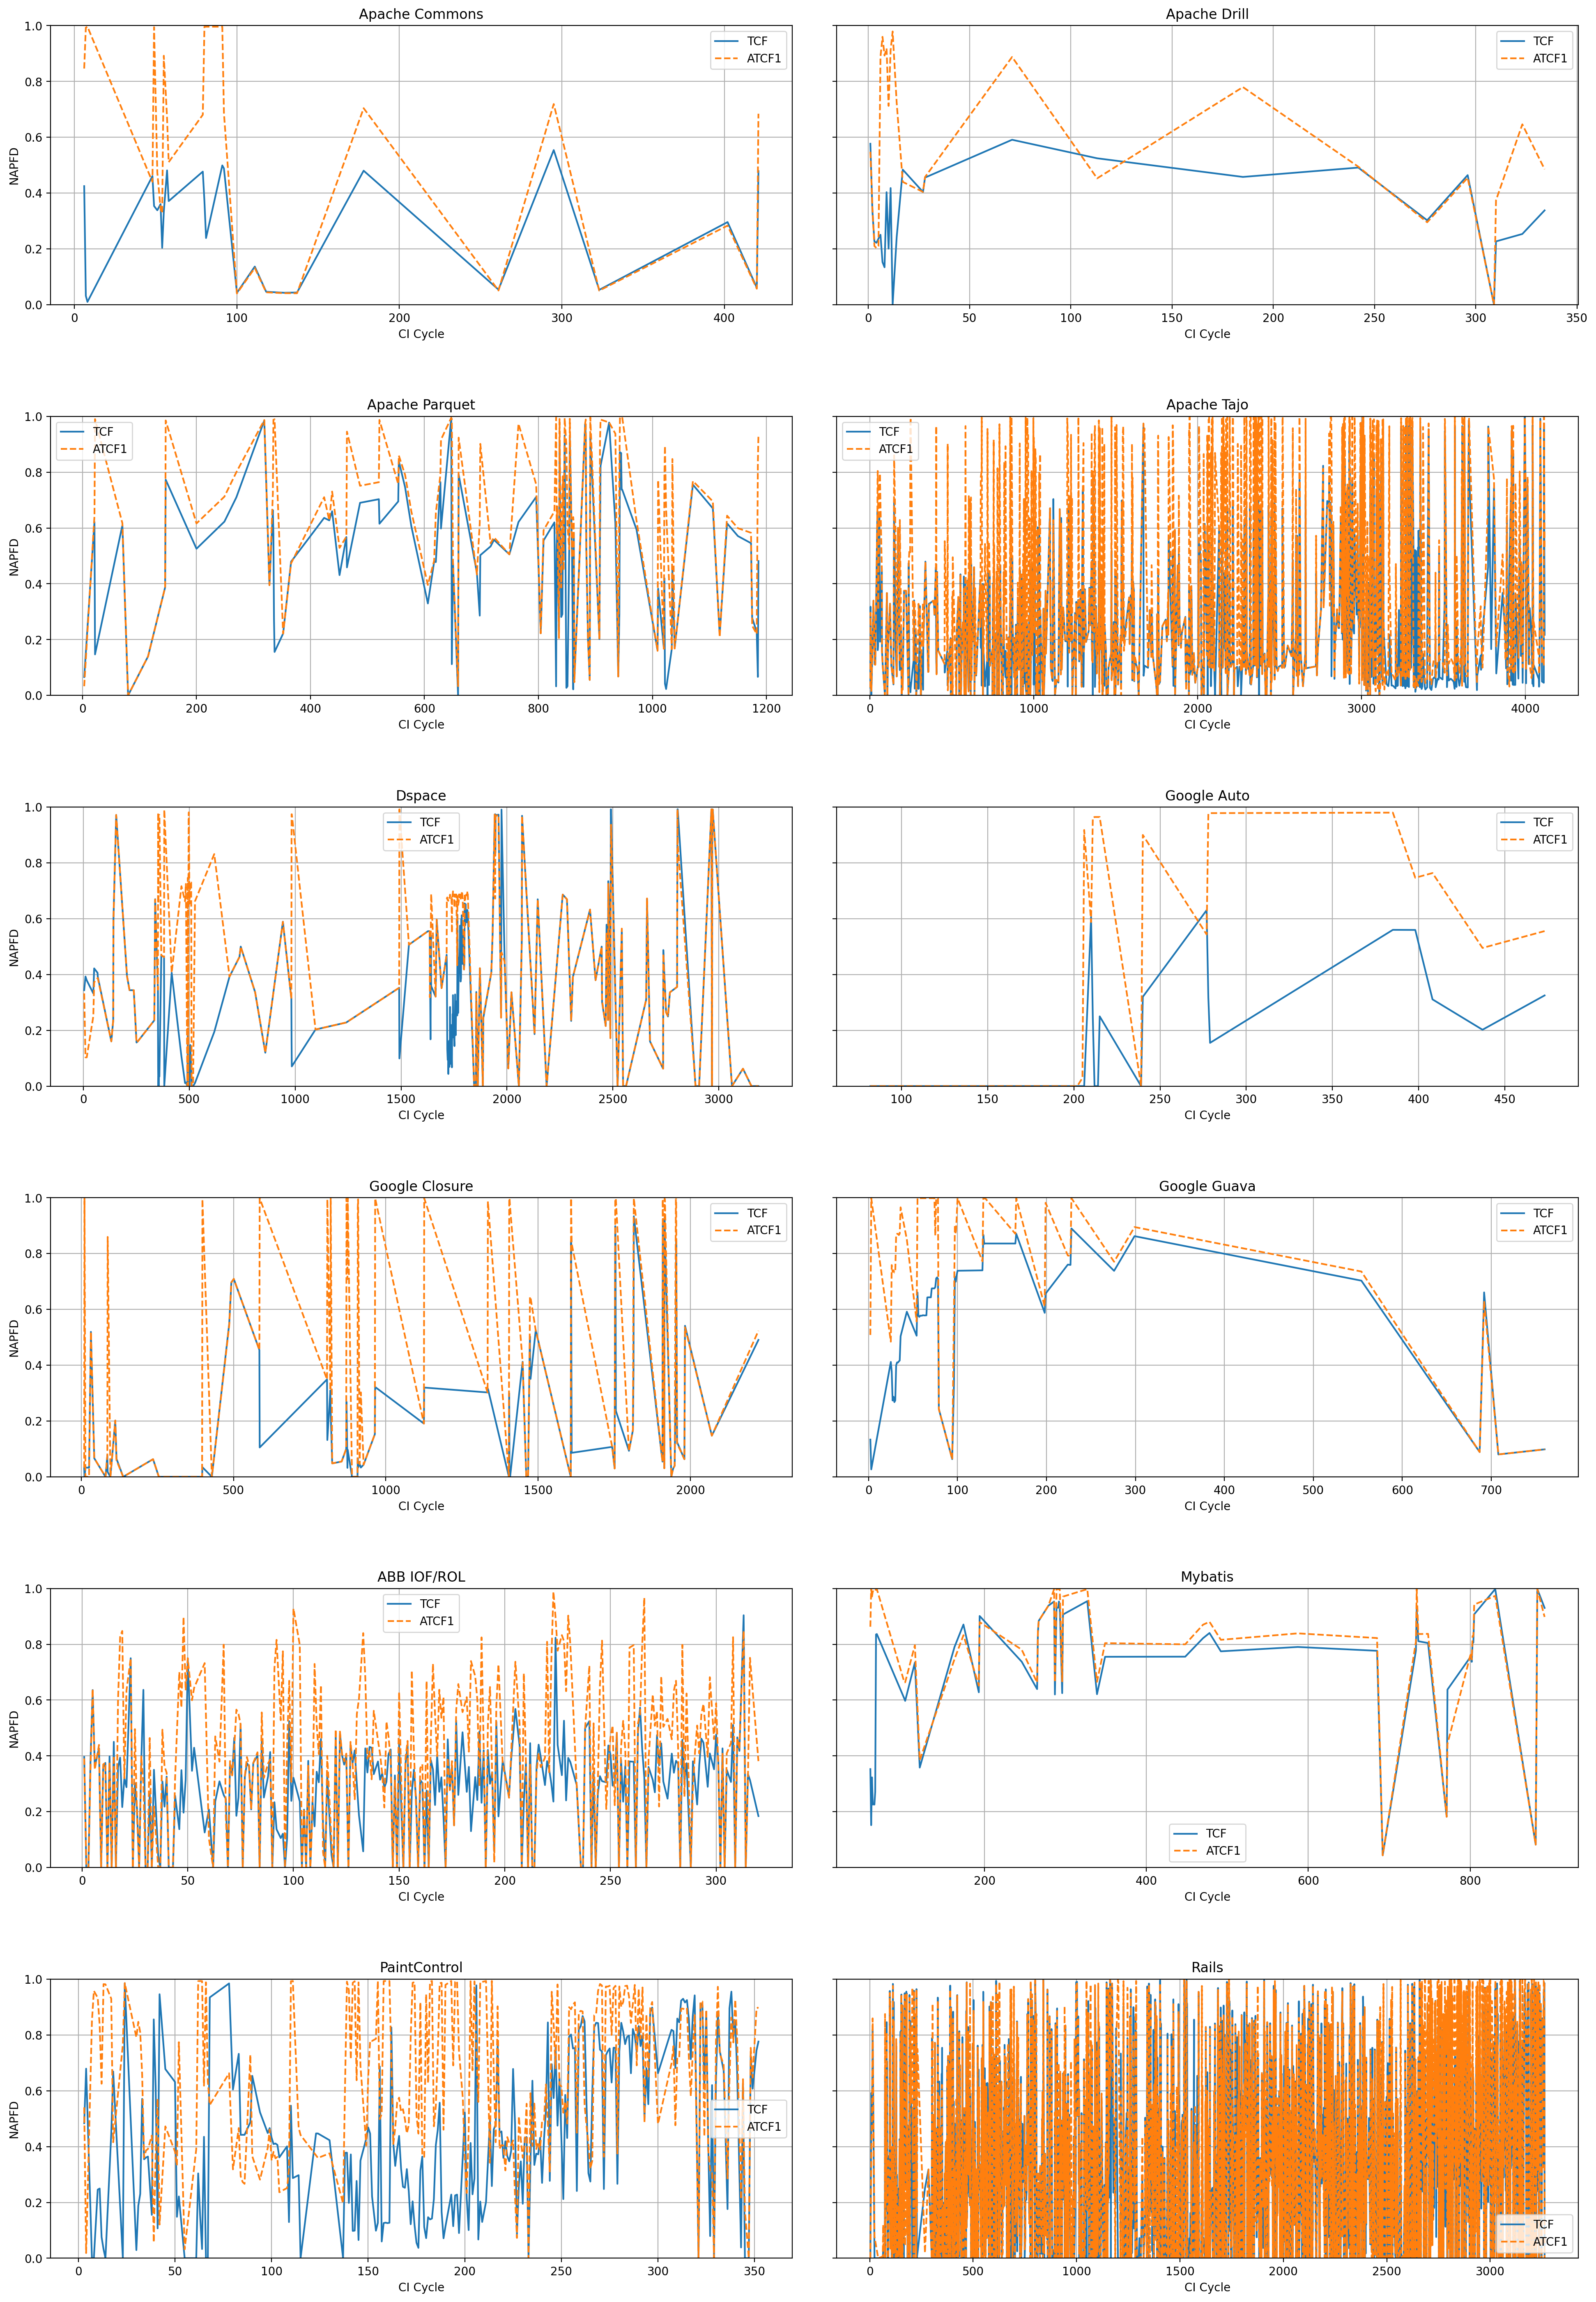

<Figure size 432x288 with 0 Axes>

In [4]:
visualize()

In [5]:
print(XXXX)

NameError: name 'XXXX' is not defined

In [ ]:
def visualize_box():
    file_path= 'novlty_aphf_rq'
    df=pd.read_pickle(file_path)
    df=df[df['rewardfun'].isin(["APHF","APHF_NV","APHF_NV25","APHF_NVH25","APHF_NVH50"])]
    for tt,tv in {'napfd':1.0,'recall':1,'ttf':30}.items():
        fig, axes = plt.subplots(7, 2, figsize=(16, 28),dpi=200)
        #plt.subplots_adjust(hspace=0.4, wspace=0.2)
        sns.set_palette('gist_earth', 7)
        color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
        xcount=ycount=0


        for column, env in enumerate(sorted(df['env'].unique())):
            #print(env_k,env_v)

            napdfdict=dict()
            for reward_k,reward_v in reward_names.items():
                newdf=df[(df['detected'] + df['missed'] > 0)&(df['env']==env)&(df['rewardfun']==reward_k)]
                newdf=newdf.groupby(['env', 'rewardfun','step'], as_index=False).mean()
                # newdf=newdf['napfd']
                #print(len(newdf['napfd'].tolist()))
                napdfdict[reward_v]=newdf[tt].tolist()

            ndf = pd.DataFrame(napdfdict)
            #print(df.info())
            if tt=='ttf':
                ndf.plot.box(  # y轴刻度范围
                grid=True,

                color=color,  # color 样式填充
                ax=axes[xcount,ycount])
            else:

                ndf.plot.box(ylim=[0, tv],  # y轴刻度范围
                            grid=True,

                            color=color,  # color 样式填充
                            ax=axes[xcount,ycount])
            axes[xcount, ycount].set_ylabel(tt.upper())


            if ycount==0:
                axes[xcount, ycount].set_title("(" + str((xcount + 1) * 2 -1) + ") " + env)
                ycount+=1
            else:
                axes[xcount, ycount].set_title("(" + str((xcount + 1) * 2 )+ ") " + env)
                ycount=0
                xcount+=1

        #axes[xcount][ycount].remove()
        #plt.title(tt+'  box')
        plt.grid(linestyle='--')
        plt.show()
        fig.savefig(os.path.join(FIGURE_DIR1, tt + '_box.png'), bbox_inches='tight')

In [ ]:
def visualize_bar():
    file_path= 'rq'
    df=pd.read_pickle(file_path)

    df=df[df['rewardfun'].isin(["aphf_all_reward","aphf_all_reward_tw5","aphf_all_novlty_noth_half0_reward_50"])]
    reward_len=len(reward_names)
    for tt, _ in {'napfd':1.0,'recall':1,'ttf':30}.items():
        fig, axes = plt.subplots(3, 2, figsize=(14, 28),dpi=50)
        plt.subplots_adjust(hspace=0.6, wspace=0.2)
        sns.set_palette('hls', 8)
        color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
        xcount=ycount=0


        for env_k,env_v in env_names.items():


            newdf=df[(df['detected'] + df['missed'] > 0)&(df['env']==env_k)]

            newdf=newdf.groupby(['env', 'rewardfun','step'], as_index=False).mean()

            if newdf.shape[0]>30:
                ndict={"step":[],'rewardfun':[],tt:[]}
                for rk,rv in reward_names.items():
                    alist=newdf[newdf['rewardfun']==rk][tt].to_list()
                    avlen=len(alist)//10
                    start=0
                    for i in range(9):
                        ndict["step"].append(i)
                        ndict['rewardfun'].append(rk)
                        ndict[tt].append(sum(alist[start:start+avlen])/avlen)
                        start+=avlen

                    # the last part
                    ndict["step"].append(9)
                    ndict['rewardfun'].append(rk)
                    ndict[tt].append(sum(alist[start:])/avlen)

                newdf=pd.DataFrame(ndict)
            else:
                ndict={"step":[],'rewardfun':[],tt:[]}
                for rk,rv in reward_names.items():
                    alist=newdf[newdf['rewardfun']==rk][tt].to_list()


                    for i in range(len(alist)):
                        ndict["step"].append(i)
                        ndict['rewardfun'].append(rk)
                        ndict[tt].append(alist[i])


                newdf=pd.DataFrame(ndict)

            # newdf = newdf.replace(["aphf_all_reward", "aphf_all_reward_tw5", "aphf_all_novlty_noth_half0_reward_50"],
            #                 ["APHF", "APHF_TW5", "APHF_NT050"])
            bz=pd.Series(newdf[newdf['rewardfun']=='APHF'][tt].to_list()*reward_len)
            # if tt=='ttf':
            #     newdf[tt] =  bz-newdf[tt]

            newdf[tt]=newdf[tt]-bz
            newdf=newdf[newdf['rewardfun'].isin(['APHF_TW5',"APHF_NT050"])]
            sns.barplot(  hue='rewardfun',
                          x="step",
                          y=tt,
                          data=newdf,
                          ax=axes[xcount,ycount])
            axes[xcount, ycount].set_ylabel(tt.upper())
            axes[xcount, ycount].set_xlabel('')


            if ycount==0:
                axes[xcount, ycount].set_title("(" + str((xcount + 1) * 2 -1) + ") " + env_v)
                ycount+=1
            else:
                axes[xcount, ycount].set_title("(" + str((xcount + 1) * 2 )+ ") " + env_v)
                ycount=0
                xcount+=1

        axes[xcount][ycount].remove()
        #plt.tight_layout()
        plt.grid(linestyle='--')
        plt.show()

        fig.savefig(os.path.join(FIGURE_DIR2, tt + '_bar.png'), bbox_inches='tight')

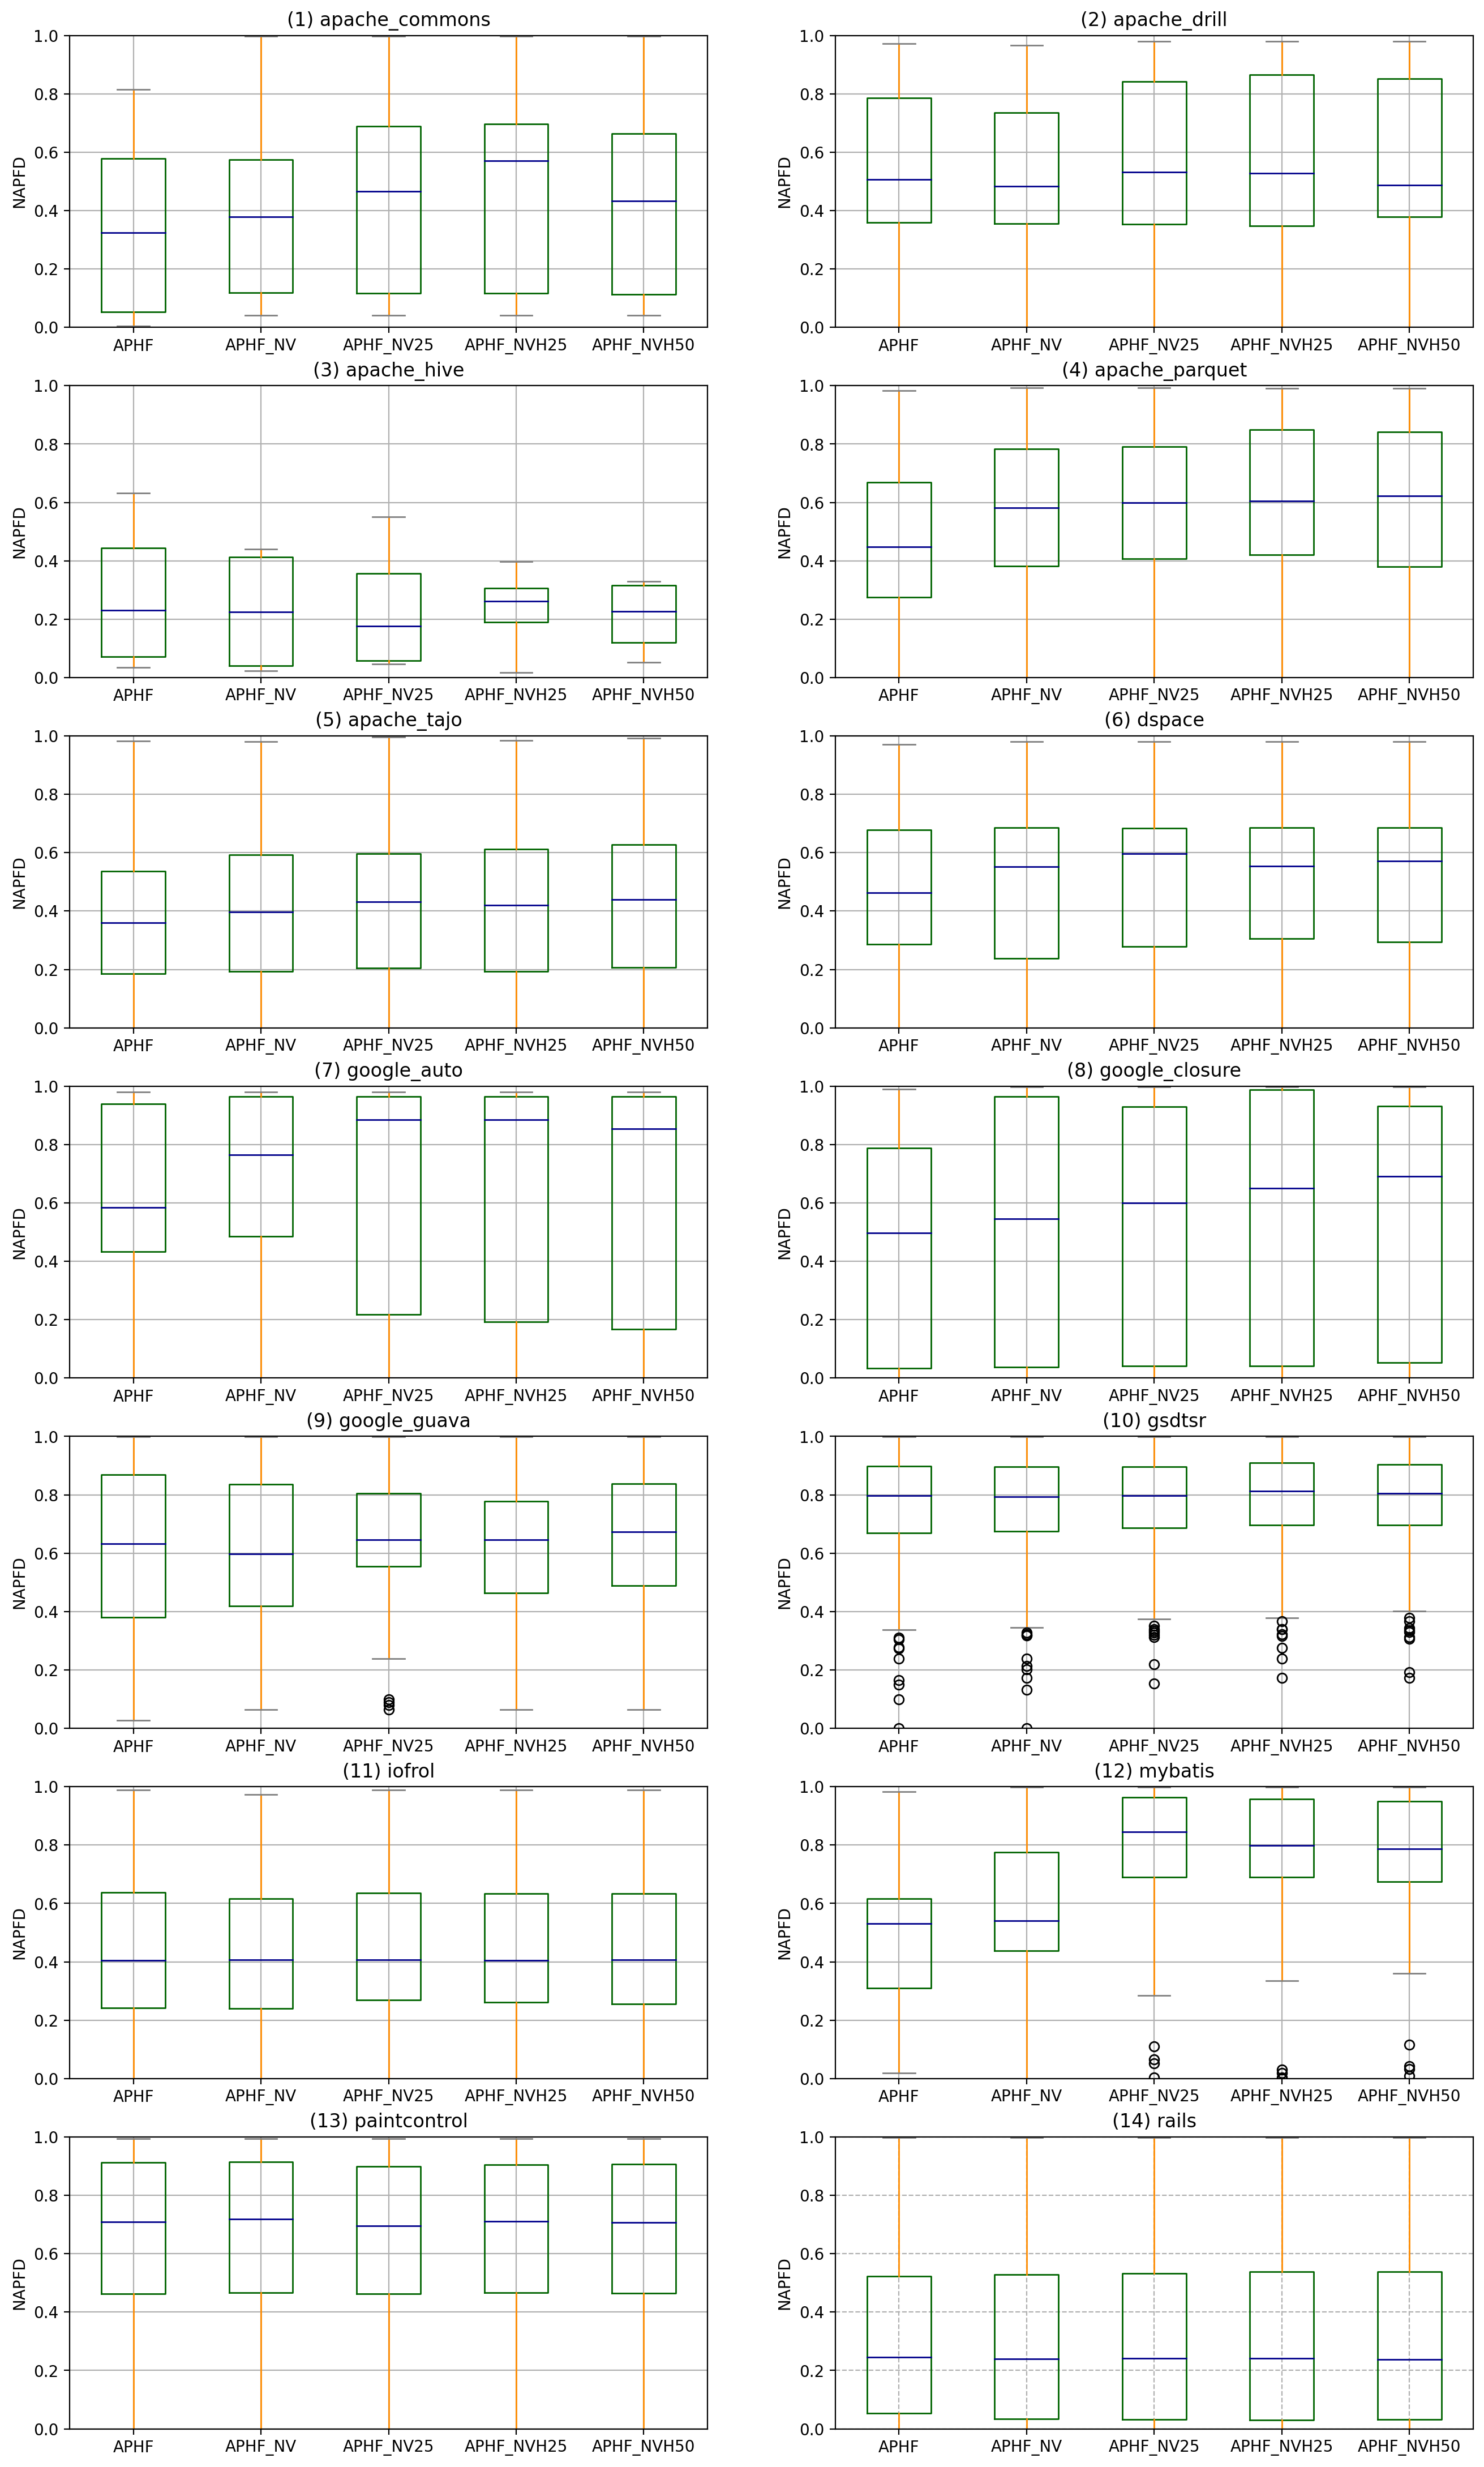

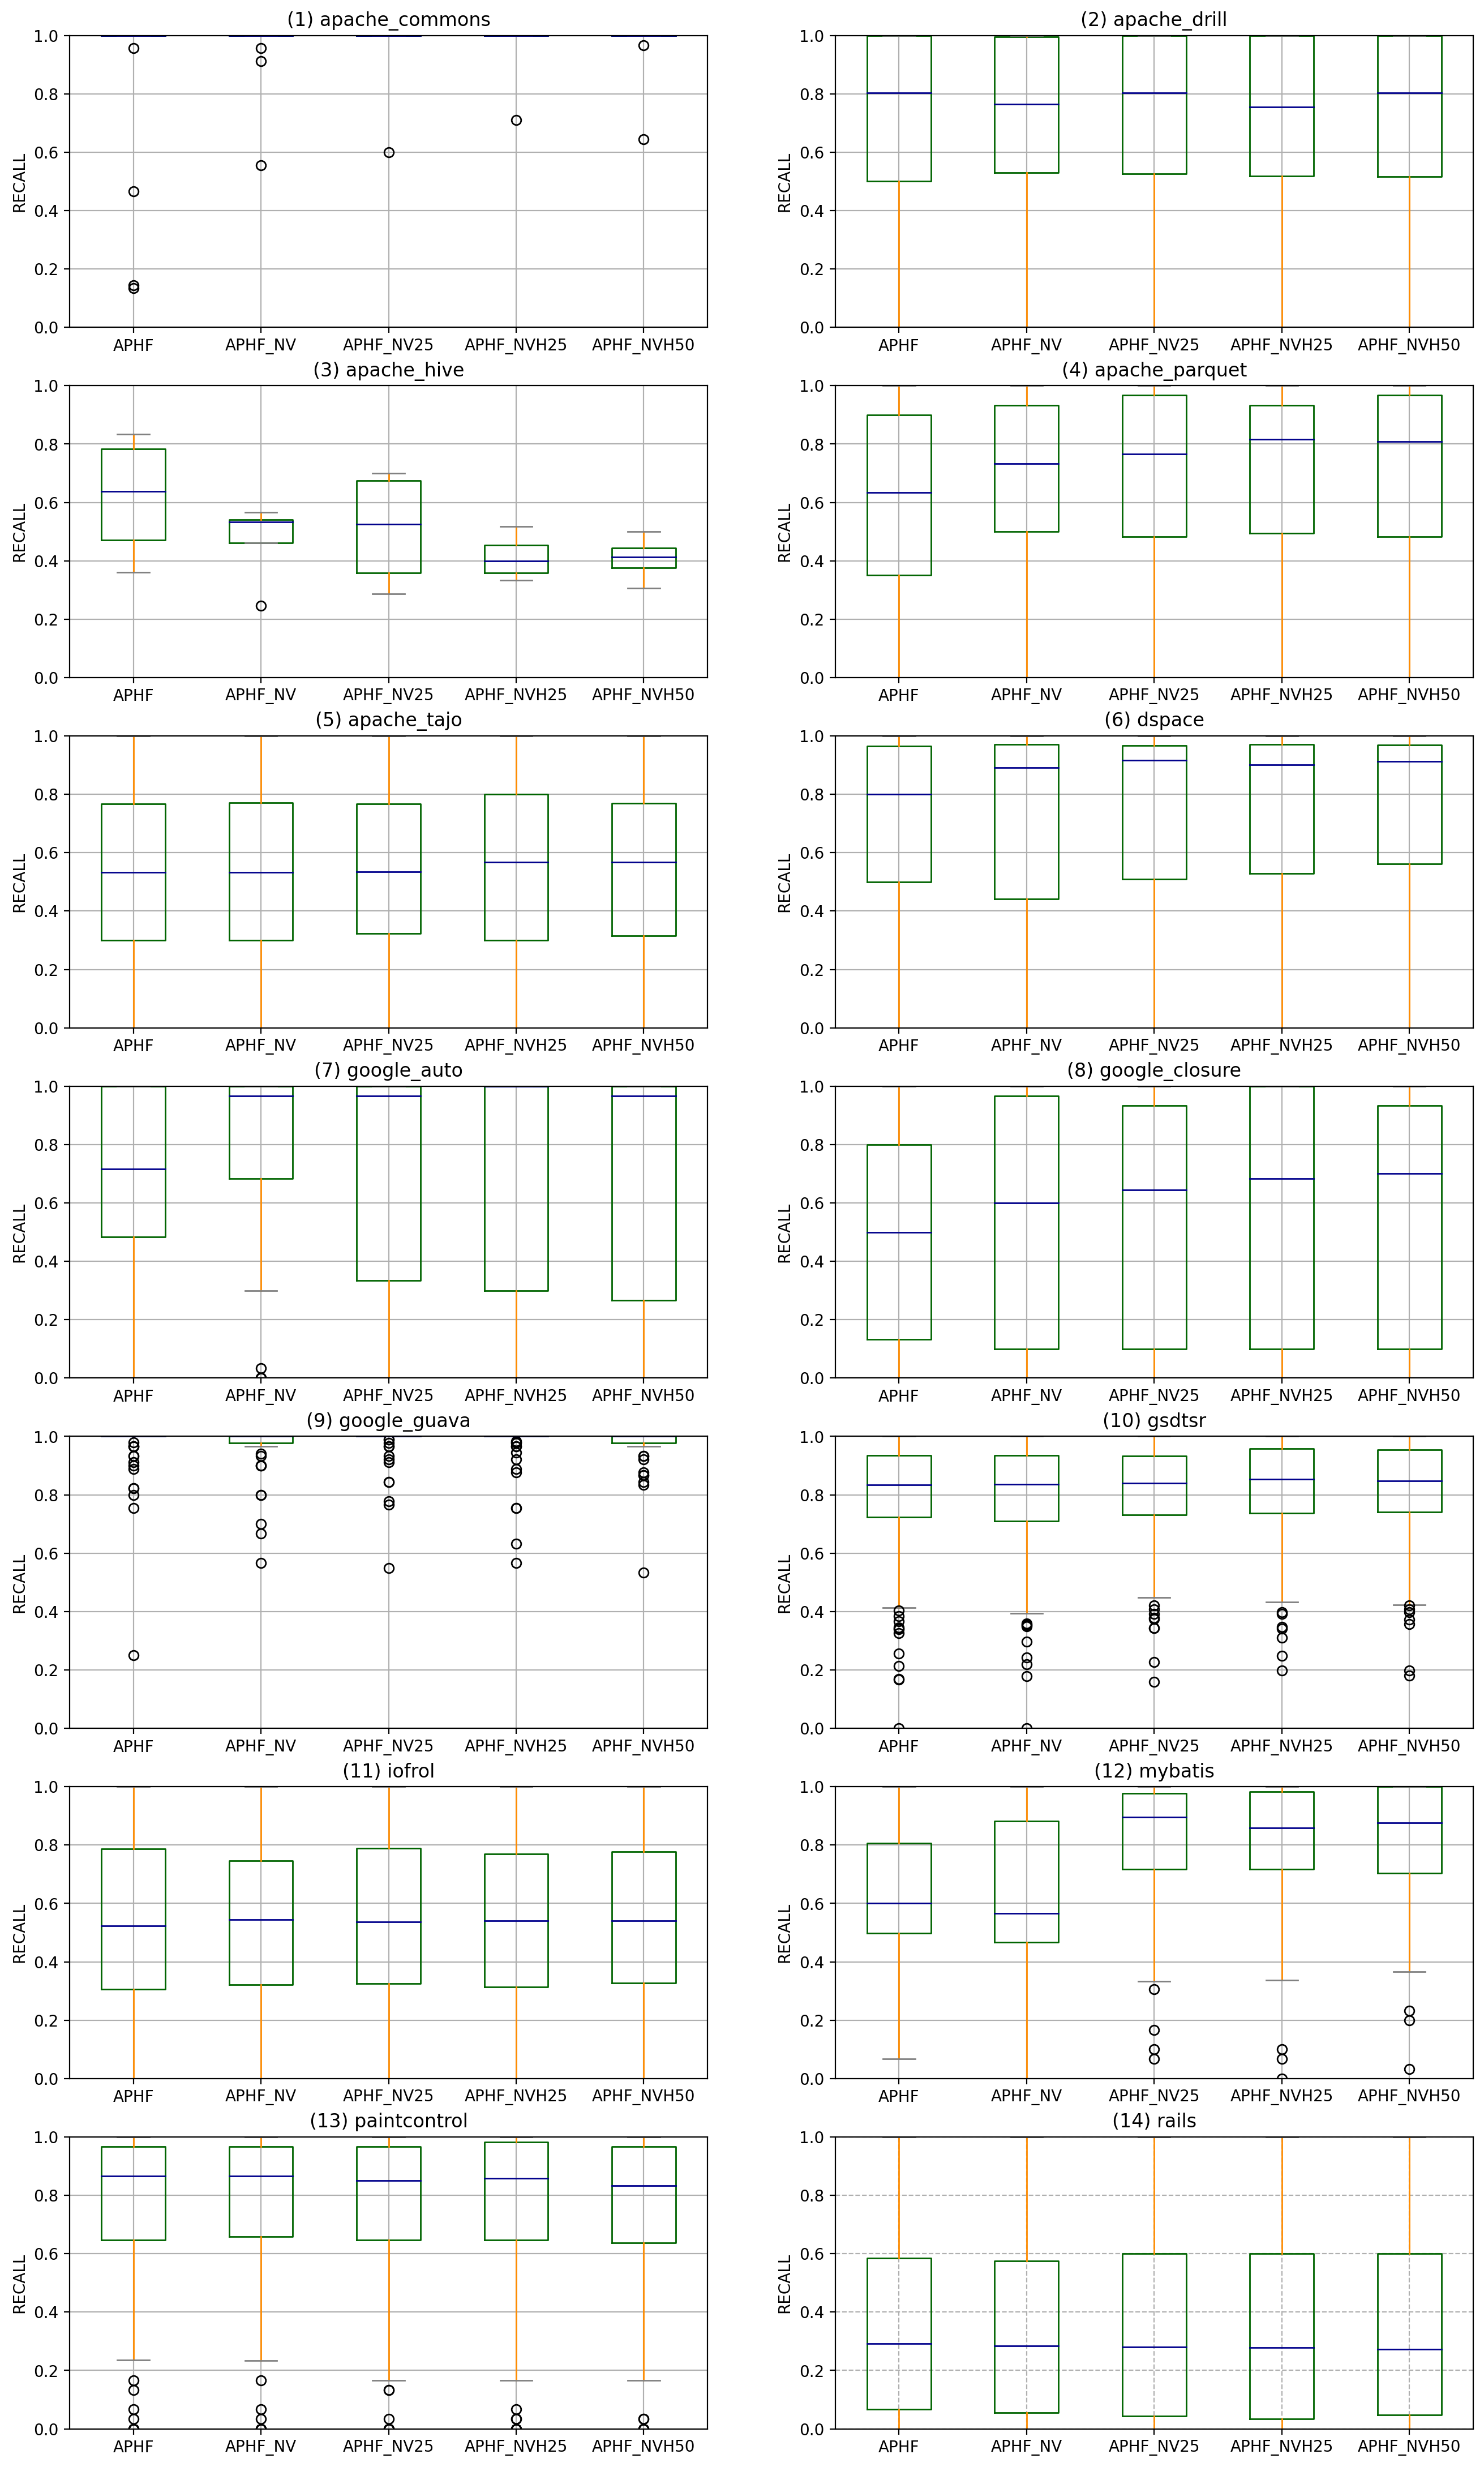

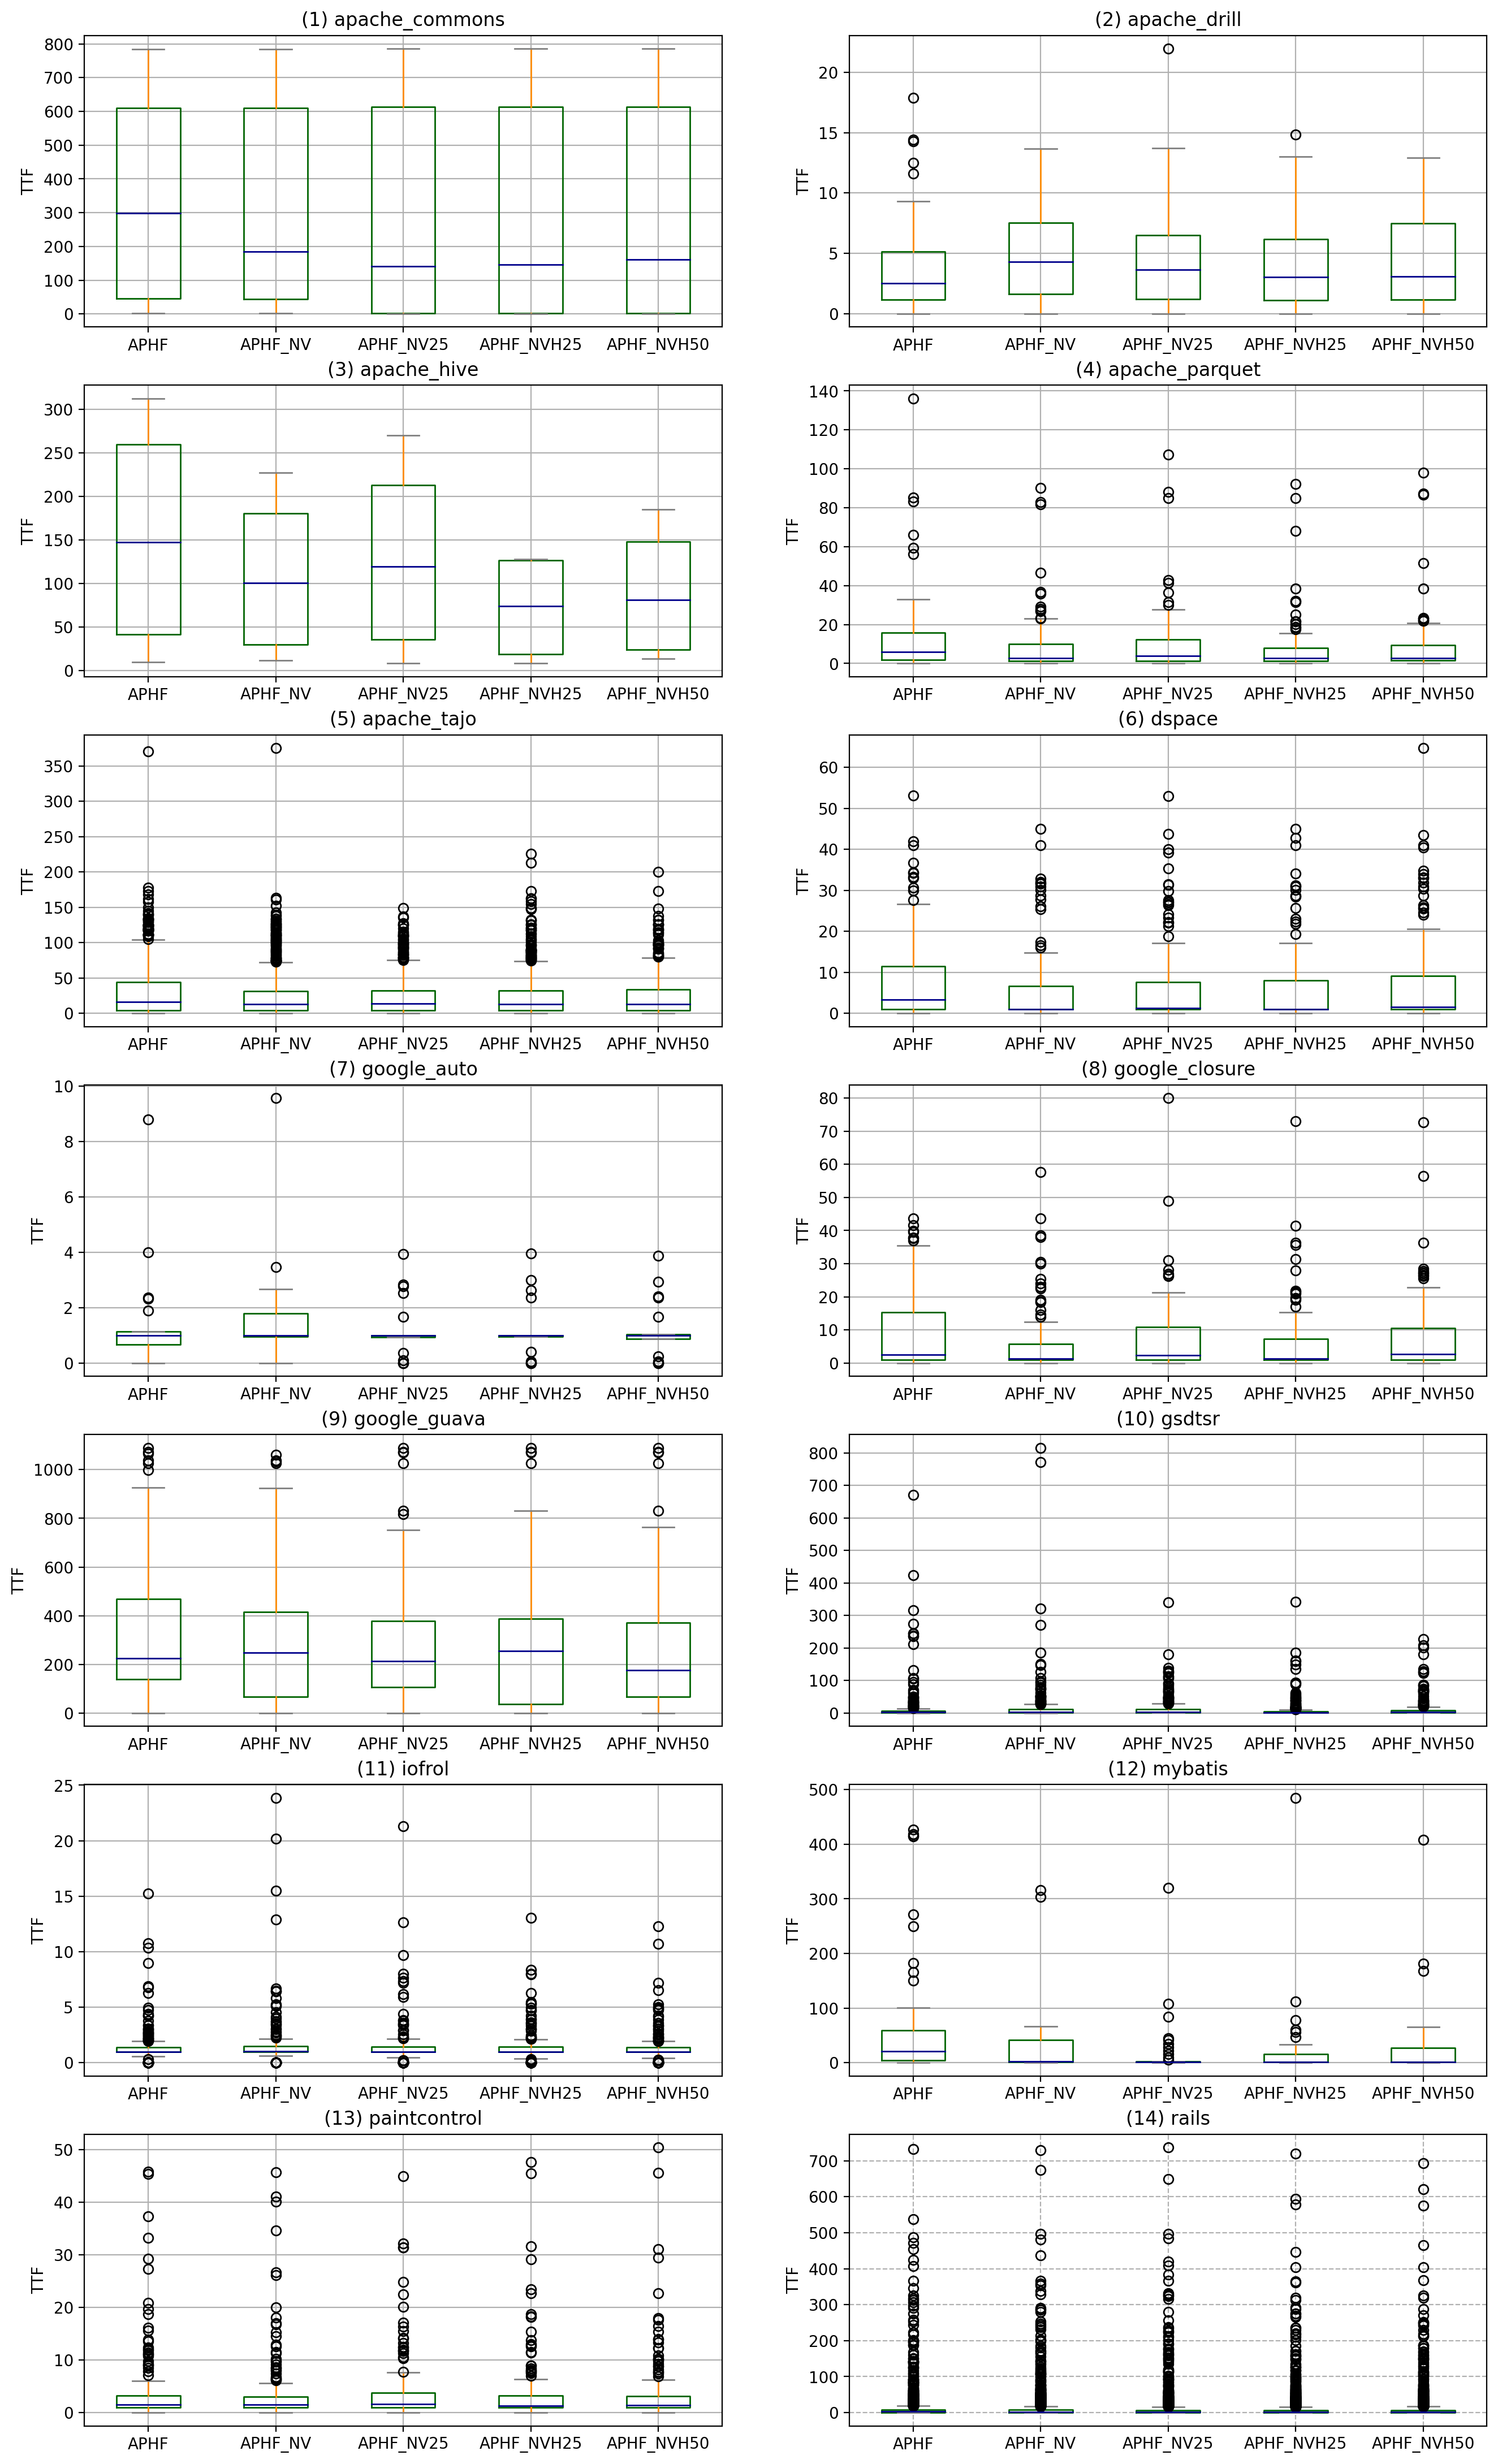

In [ ]:
visualize_box()
#visualize_bar()